## AOC 2024/13

### Part 1

--- Day 13: Claw Contraption ---

Next up: the lobby of a resort on a tropical island. The Historians take a moment to admire the hexagonal floor tiles before spreading out.

Fortunately, it looks like the resort has a new arcade! Maybe you can win some prizes from the claw machines?

The claw machines here are a little unusual. Instead of a joystick or directional buttons to control the claw, these machines have two buttons labeled A and B. Worse, you can't just put in a token and play; it costs 3 tokens to push the A button and 1 token to push the B button.

With a little experimentation, you figure out that each machine's buttons are configured to move the claw a specific amount to the right (along the X axis) and a specific amount forward (along the Y axis) each time that button is pressed.

Each machine contains one prize; to win the prize, the claw must be positioned exactly above the prize on both the X and Y axes.

You wonder: what is the smallest number of tokens you would have to spend to win as many prizes as possible? You assemble a list of every machine's button behavior and prize location (your puzzle input). For example:

```
Button A: X+94, Y+34
Button B: X+22, Y+67
Prize: X=8400, Y=5400
```

```
Button A: X+26, Y+66
Button B: X+67, Y+21
Prize: X=12748, Y=12176
```

```
Button A: X+17, Y+86
Button B: X+84, Y+37
Prize: X=7870, Y=6450
```

```
Button A: X+69, Y+23
Button B: X+27, Y+71
Prize: X=18641, Y=10279
```

This list describes the button configuration and prize location of four different claw machines.

For now, consider just the first claw machine in the list:

Pushing the machine's A button would move the claw 94 units along the X axis and 34 units along the Y axis.
Pushing the B button would move the claw 22 units along the X axis and 67 units along the Y axis.
The prize is located at X=8400, Y=5400; this means that from the claw's initial position, it would need to move exactly 8400 units along the X axis and exactly 5400 units along the Y axis to be perfectly aligned with the prize in this machine.
The cheapest way to win the prize is by pushing the A button 80 times and the B button 40 times. This would line up the claw along the X axis (because 80*94 + 40*22 = 8400) and along the Y axis (because 80*34 + 40*67 = 5400). Doing this would cost 80*3 tokens for the A presses and 40*1 for the B presses, a total of 280 tokens.

For the second and fourth claw machines, there is no combination of A and B presses that will ever win a prize.

For the third claw machine, the cheapest way to win the prize is by pushing the A button 38 times and the B button 86 times. Doing this would cost a total of 200 tokens.

So, the most prizes you could possibly win is two; the minimum tokens you would have to spend to win all (two) prizes is 480.

You estimate that each button would need to be pressed no more than 100 times to win a prize. How else would someone be expected to play?

Figure out how to win as many prizes as possible. What is the fewest tokens you would have to spend to win all possible prizes?

**AI Prompt**

I'm a skilled python developer, please help go consider various approaches for solving this problem and their pros/cons. I prefer simpler and understandable solutions, easily readable also for other developers. It's ok to generate code with testcases without explanation. I'll ask if I do not understand it. Always wrap test code into a function, to not clutter the global variable namespace.

**AI Response**

For this problem, we essentially need to solve linear Diophantine equations for each machine, with constraints that the solutions must be non-negative and reasonably small (< 100).

Let's break down the approaches:

1. Brute Force Approach:
   - Simple to implement and understand
   - Try all combinations of A and B presses up to 100
   - Cons: Not very efficient, but given the small search space (100x100), it's viable

2. Mathematical Approach:
   - Use Extended Euclidean Algorithm to find solutions to Diophantine equations
   - More efficient but more complex to implement
   - Need to check if solutions fall within our constraints

Would you like me to implement one of these approaches? Which one interests you more?

Here's a quick test case setup we can use for either approach:

```python
def test_cases():
    return [
        ((94, 34, 22, 67, 8400, 5400), 280),  # Machine 1: solvable
        ((26, 66, 67, 21, 12748, 12176), -1), # Machine 2: unsolvable
        ((17, 86, 84, 37, 7870, 6450), 200),  # Machine 3: solvable
        ((69, 23, 27, 71, 18641, 10279), -1), # Machine 4: unsolvable
    ]
```

Which approach would you like to explore first?

**AI Prompt**

what is Diophantine equation?

**AI Response**

A Diophantine equation is a polynomial equation where we're looking for integer solutions only. In our case, we have two linear equations for each machine:

For example, with the first machine:
- aX + bY = target_x  (where a=94, b=22, target_x=8400)
- aX + bY = target_y  (where a=34, b=67, target_y=5400)

We need to find non-negative integers X and Y (number of A and B button presses) that satisfy both equations.

Would you prefer to start with the simpler brute force approach to get a working solution first? Then we could explore the mathematical approach if you're interested.

**AI Prompt**

lets go with the mathematical approach. Please explain me the Extended Euclidean Algorithm

**AI Response**

The Extended Euclidean Algorithm is used to find the greatest common divisor (GCD) of two numbers, but it also finds the coefficients of Bézout's identity - that is, it finds x and y in the equation:

ax + by = gcd(a,b)

Here's a simple example:
Let's find GCD of 26 and 15:
1. 26 = 1 × 15 + 11
2. 15 = 1 × 11 + 4
3. 11 = 2 × 4 + 3
4. 4 = 1 × 3 + 1
5. 3 = 3 × 1 + 0

So GCD is 1, and working backwards we can find x and y:
1 = 4 - 1 × 3
1 = 4 - 1 × (11 - 2 × 4) = 3 × 4 - 1 × 11
1 = 3 × (15 - 1 × 11) - 1 × 11 = 3 × 15 - 4 × 11
1 = 3 × 15 - 4 × (26 - 1 × 15) = 7 × 15 - 4 × 26

Therefore: 7 × 15 - 4 × 26 = 1

Would you like me to show how this helps us solve our claw machine problem?

**AI Prompt**

please remind me, how does the normal Euclidean Algorithm work?

**AI Response**

The normal Euclidean Algorithm finds the GCD (Greatest Common Divisor) of two numbers by repeatedly dividing and taking the remainder until we get 0.

Let's use the same numbers from before (26 and 15):

1. First divide 26 by 15:
   - 26 = 1 × 15 + 11 (remainder is 11)

2. Then divide 15 by 11:
   - 15 = 1 × 11 + 4 (remainder is 4)

3. Then divide 11 by 4:
   - 11 = 2 × 4 + 3 (remainder is 3)

4. Then divide 4 by 3:
   - 4 = 1 × 3 + 1 (remainder is 1)

5. Finally divide 3 by 1:
   - 3 = 3 × 1 + 0 (remainder is 0)

When we get a remainder of 0, the last non-zero remainder (1 in this case) is our GCD.

Would you like me to show how this compares to the extended version we'll use for our claw machine problem?

**AI Prompt**

for numbers such as 2121 and 1491?

**AI Response**

Let's work through the Euclidean Algorithm with 2121 and 1491:

2121 = 1 × 1491 + 630   (divide 2121 by 1491)
1491 = 2 × 630 + 231    (divide 1491 by 630)
630 = 2 × 231 + 168     (divide 630 by 231)
231 = 1 × 168 + 63      (divide 231 by 168)
168 = 2 × 63 + 42       (divide 168 by 63)
63 = 1 × 42 + 21        (divide 63 by 42)
42 = 2 × 21 + 0         (divide 42 by 21)

Therefore, the GCD of 2121 and 1491 is 21 (the last non-zero remainder).

Would you like to see how we could verify this, or shall we continue with how this helps us with the claw machine problem?

**AI Prompt**

ok, now I understand the extended Euclidean Algorithm. How exactly is result of Euclidean Algorithm used for solution in Diophantine equation?

**AI Response**

For a Diophantine equation ax + by = c, we can use the Extended Euclidean Algorithm in two key steps:

1. First, we check if the equation has any solutions:
   - If c is not divisible by gcd(a,b), there are NO integer solutions
   - This makes sense because ax + by must be divisible by any common factor of a and b

2. If solutions exist, we:
   - Use Extended Euclidean to find x₀, y₀ where ax₀ + by₀ = gcd(a,b)
   - Then multiply both sides by (c/gcd(a,b)) to get a particular solution
   - The general solution is then:
     x = x₀ * (c/gcd) + k * (b/gcd)
     y = y₀ * (c/gcd) - k * (a/gcd)
   where k is any integer

For our claw machine, we need solutions where both x and y are non-negative and less than 100.

Would you like to see how this applies to one of our test cases?

**AI Prompt**

having solution ```ax₀ + by₀ = gcd(a,b)``` how did you infer the equation of  general solution?

**AI Response**

Let's derive the general solution step by step:

1. First, we have ax₀ + by₀ = gcd(a,b)

2. Multiply both sides by (c/gcd(a,b)) to get:
   a(x₀*c/gcd) + b(y₀*c/gcd) = c
   This is one solution to ax + by = c

3. Now, if we have any solution, adding a term that equals zero won't change it
   We know that a(b/gcd) + b(-a/gcd) = 0

4. So for any k, we can add k times this zero term:
   a(x₀*c/gcd + k*b/gcd) + b(y₀*c/gcd - k*a/gcd) = c

5. Therefore any solution has the form:
   x = x₀*c/gcd + k*b/gcd
   y = y₀*c/gcd - k*a/gcd

Would you like me to verify this with a numerical example?

**AI Prompt**

explain how 4. implies 5. That is that **ALL** solutions have form ```x = x₀c/gcd + kb/gcd``` ```y = y₀c/gcd - ka/gcd```

**AI Response**

Ah, good question - I only showed that these formulas give valid solutions, but not that ALL solutions must have this form. Let me prove why this is the complete set of solutions:

Suppose we have two different solutions (x₁,y₁) and (x₂,y₂) to ax + by = c

Then:
ax₁ + by₁ = c
ax₂ + by₂ = c

Subtracting these equations:
a(x₁-x₂) + b(y₁-y₂) = 0

Rearranging:
a(x₁-x₂) = -b(y₁-y₂)

Since a and b share only factors in their gcd, x₁-x₂ must be a multiple of b/gcd(a,b)
Similarly, y₁-y₂ must be a multiple of a/gcd(a,b)

This proves that any two solutions must differ by these multiples, which is exactly what our formula describes.

Would you like me to elaborate on any part of this proof?

**AI Prompt**

explain:
Since a and b share only factors in their gcd, x₁-x₂ must be a multiple of b/gcd(a,b)

**AI Response**

Let's break this down:

1. We have: a(x₁-x₂) = -b(y₁-y₂)

2. This means: a(x₁-x₂) is divisible by b

3. Let's say b = gcd × b' where b' = b/gcd(a,b)
   Similarly, a = gcd × a' where a' = a/gcd(a,b)

4. Then: (gcd × a')(x₁-x₂) = -(gcd × b')(y₁-y₂)
   Simplifying: a'(x₁-x₂) = -b'(y₁-y₂)

5. Key point: a' and b' are coprime (they share no common factors), because we divided out their GCD

6. Therefore, since a'(x₁-x₂) is divisible by b', and a' and b' are coprime, x₁-x₂ must be divisible by b'

Would you like me to explain any of these steps in more detail?

**AI Prompt**

thanks, I undestand now. We can proceed with the implementation

**AI Response**

Let's implement this solution step by step. We'll need:

1. A function for Extended Euclidean Algorithm
2. A function to solve one Diophantine equation
3. A function to handle both X and Y equations for each machine
4. A way to check if solutions are within bounds (0-100)

Would you like me to start with implementing the Extended Euclidean Algorithm, or would you prefer to implement it yourself? 

Here's the function signature we could use:
```python
def extended_gcd(a: int, b: int) -> tuple[int, int, int]:
    """Returns (gcd, x, y) such that a*x + b*y = gcd"""
```

How would you like to proceed?

**AI Prompt**

start with 1.

**AI Response**

Here's an implementation of the Extended Euclidean Algorithm:

```python
def extended_gcd(a: int, b: int) -> tuple[int, int, int]:
    """Returns (gcd, x, y) such that a*x + b*y = gcd"""
    if b == 0:
        return a, 1, 0
    
    gcd, x1, y1 = extended_gcd(b, a % b)
    x = y1
    y = x1 - (a // b) * y1
    return gcd, x, y

def test_extended_gcd():
    # Test case 1: GCD(26,15) = 1
    gcd, x, y = extended_gcd(26, 15)
    assert gcd == 1
    assert 26*x + 15*y == 1
    
    # Test case 2: GCD(2121,1491) = 21
    gcd, x, y = extended_gcd(2121, 1491)
    assert gcd == 21
    assert 2121*x + 1491*y == 21
    
    print("All tests passed!")

test_extended_gcd()
```

Would you like me to explain how this implementation works, or shall we move on to implementing the Diophantine equation solver?

In [ ]:
def extended_gcd(a: int, b: int) -> tuple[int, int, int]:
    """Returns (gcd, x, y) such that a*x + b*y = gcd"""
    if b == 0:
        return a, 1, 0
    
    gcd, x1, y1 = extended_gcd(b, a % b)
    x = y1
    y = x1 - (a // b) * y1
    return gcd, x, y

def test_extended_gcd():
    # Test case 1: GCD(26,15) = 1
    gcd, x, y = extended_gcd(26, 15)
    assert gcd == 1
    assert 26*x + 15*y == 1
    
    # Test case 2: GCD(2121,1491) = 21
    gcd, x, y = extended_gcd(2121, 1491)
    assert gcd == 21
    assert 2121*x + 1491*y == 21
    
    print("All tests passed!")

test_extended_gcd()

All tests passed!


**AI Prompt**

understand, now step 2.

**AI Response**

Here's the implementation for solving a single Diophantine equation ax + by = c:

```python
def solve_diophantine(a: int, b: int, c: int) -> tuple[bool, tuple[int, int, int, int] | None]:
    """
    Solves the Diophantine equation ax + by = c
    Returns (success, (x0, y0, b/gcd, -a/gcd)) where:
    - x = x0 + k * (b/gcd)
    - y = y0 - k * (a/gcd)
    for any integer k
    """
    gcd, x0, y0 = extended_gcd(abs(a), abs(b))
    if c % gcd != 0:  # No solution exists
        return False, None
    
    # Adjust for sign and scale to match c
    x0 *= c // gcd * (1 if a > 0 else -1)
    y0 *= c // gcd * (1 if b > 0 else -1)
    
    return True, (x0, y0, b // gcd, -a // gcd)

def test_diophantine():
    # Test case from first claw machine X equation: 94x + 22y = 8400
    success, solution = solve_diophantine(94, 22, 8400)
    assert success
    x0, y0, dx, dy = solution
    # Verify a few solutions
    for k in range(3):
        x = x0 + k * dx
        y = y0 + k * dy
        assert 94*x + 22*y == 8400
    print("All tests passed!")

test_diophantine()
```

This function returns both a particular solution (x0, y0) and the values needed to generate all solutions using x = x0 + k*(b/gcd) and y = y0 + k*(-a/gcd).

Would you like me to explain any part in detail before we move to step 3?

In [ ]:
def solve_diophantine(a: int, b: int, c: int) -> tuple[bool, tuple[int, int, int, int] | None]:
    """
    Solves the Diophantine equation ax + by = c
    Returns (success, (x0, y0, b/gcd, -a/gcd)) where:
    - x = x0 + k * (b/gcd)
    - y = y0 - k * (a/gcd)
    for any integer k
    """
    gcd, x0, y0 = extended_gcd(abs(a), abs(b))
    if c % gcd != 0:  # No solution exists
        return False, None
    
    # Adjust for sign and scale to match c
    x0 *= c // gcd * (1 if a > 0 else -1)
    y0 *= c // gcd * (1 if b > 0 else -1)
    
    return True, (x0, y0, b // gcd, -a // gcd)

def test_diophantine():
    # Test case from first claw machine X equation: 94x + 22y = 8400
    success, solution = solve_diophantine(94, 22, 8400)
    assert success
    x0, y0, dx, dy = solution
    # Verify a few solutions
    for k in range(3):
        x = x0 + k * dx
        y = y0 + k * dy
        assert 94*x + 22*y == 8400
    print("All tests passed!")

test_diophantine()

All tests passed!


**AI Prompt**

There are the four Diophantine equation for the machines. Am I right?

Machine 1:
  - 94X + 22Y = 8400  
  - 34X + 67Y = 5400

Machine 2:
  - 26X + 67Y = 12748
  - 66X + 21Y = 12176

Machine 3:
  - 17X + 84Y = 7870
  - 86X + 37Y = 6450

Machine 4
  - 69X + 27Y = 18641
  - 23X + 71Y = 10279

**AI Response**

Yes, that's correct! For each machine we have two Diophantine equations:
- One for the X coordinate (ax + by = target_x)
- One for the Y coordinate (cx + dy = target_y)

To solve each machine's puzzle, we need to:
1. Find solutions for both equations
2. Find values where the solutions overlap (same X and Y values)
3. Check if these values are within bounds (0-100)
4. Calculate the token cost (3X + Y)

For a machine to be solvable, we need at least one set of X,Y values that satisfies both equations and is within bounds.

Would you like to proceed with implementing the solution for handling both equations of a single machine?

In [ ]:
print(solve_diophantine(94, 22, 8400))
print(solve_diophantine(34, 67, 5400))

(True, (16800, -71400, 11, -47))
(True, (10800, -5400, 67, -34))


In [ ]:
print(solve_diophantine(26, 67, 12748))
print(solve_diophantine(66, 21, 12176))

(True, (-229464, 89236, 67, -26))
(False, None)


generic solution of Diophantine equation

```x = x₀*c/gcd + k*b/gcd```

```y = y₀*c/gcd - k*a/gcd```

can be reformulated by renaming `x => X` `y => Y` `x₀*c/gcd => x` `y₀*c/gcd => y` `b/gcd => dx` `-a/gcd => dy` to:

```X = x + k*dx```

```Y = y - k*dy```

In [ ]:
solve_diophantine(94, 34, 8400)

(True, (16800, -46200, 17, -47))

We want to test at most 100 moves at the machine, therefore:

`0 <= X = x + k*dx <= 100`  => `-x <= k*dx <= 100-x`  =>  `-x/dx <= k <= (100-x)/dx`    (if dx>0)

`0 <= Y = y + k*dy <= 100`  => `-y <= k*dy <= 100-y`  =>  `-y/dy >= k >= (100-y)/dy`    (if dy<0)

In [ ]:
import math

def intersection(range1: tuple[int, int], range2: tuple[int, int]) -> tuple[int, int]:
    return (max(range1[0], range2[0]), min(range1[1], range2[1]))

def debug_diophantine_solutions(a, b, c, XY_max=100):  # aX + bY = c    
    _, (x, y, dx, dy) = solve_diophantine(a, b, c)
    print(f"Solutions of {a}*X + {b}*Y = {c}")
    print(f"  x={x} y={y} dx={dx} dy={dy}")
    print(f"have forms")
    print(f"  X=x + k*dx = {x} + k*{dx}")
    print(f"  Y=y + k*dy = {y} + k*{dy}")
    k_rangex_f = sorted([-x/dx, (XY_max-x)/dx])
    k_rangey_f = sorted([-y/dy, (XY_max-y)/dy])
    # print("k_rangex_f", k_rangex_f, "k_rangey_f", k_rangey_f)
    k_rangex_i = (math.ceil(k_rangex_f[0]), math.floor(k_rangex_f[1]))
    k_rangey_i = (math.ceil(k_rangey_f[0]), math.floor(k_rangey_f[1]))
    # print("k_rangex_i", k_rangex_i, "k_rangey_i", k_rangey_i)
    k_range = intersection(k_rangex_i, k_rangey_i)
    # print(f"k = [{k_range[0]}..{k_range[1]}]")
    print(f"e.g.:")
    for k in range(k_range[0], k_range[1]+1):
        X = x + k*dx
        Y = y + k*dy
        assert (a*X + b*Y) == c
        print(f"  k={k}  =>  X={X} Y={Y}  =>  {a}*{X} + {b}*{Y} = {c}")

debug_diophantine_solutions(a=94,b=22,c=8400)
print("\n")
debug_diophantine_solutions(a=34,b=67,c=5400)

Solutions of 94*X + 22*Y = 8400
  x=16800 y=-71400 dx=11 dy=-47
have forms
  X=x + k*dx = 16800 + k*11
  Y=y + k*dy = -71400 + k*-47
e.g.:
  k=-1521  =>  X=69 Y=87  =>  94*69 + 22*87 = 8400
  k=-1520  =>  X=80 Y=40  =>  94*80 + 22*40 = 8400


Solutions of 34*X + 67*Y = 5400
  x=10800 y=-5400 dx=67 dy=-34
have forms
  X=x + k*dx = 10800 + k*67
  Y=y + k*dy = -5400 + k*-34
e.g.:
  k=-161  =>  X=13 Y=74  =>  34*13 + 67*74 = 5400
  k=-160  =>  X=80 Y=40  =>  34*80 + 67*40 = 5400


**AI Prompt**

thanks I understand the code, proceed with 3 and create testcase for examples from problem input

**AI Response**

Here's the implementation for solving a complete machine puzzle:

```python
def solve_machine(ax: int, ay: int, bx: int, by: int, target_x: int, target_y: int) -> tuple[bool, int | None]:
    """
    Solves a single machine puzzle, returns (solvable, min_tokens)
    where min_tokens is the minimum number of tokens needed (3*A + B)
    """
    # Solve both equations
    success_x, sol_x = solve_diophantine(ax, bx, target_x)
    success_y, sol_y = solve_diophantine(ay, by, target_y)
    
    if not (success_x and success_y):
        return False, None
        
    x0_x, y0_x, dx_x, dy_x = sol_x
    x0_y, y0_y, dx_y, dy_y = sol_y
    
    # Find k ranges for both equations where 0 <= x,y <= 100
    k_x_range = sorted([(-x0_x/dx_x, (100-x0_x)/dx_x)])
    k_y_range = sorted([(-y0_x/dy_x, (100-y0_x)/dy_x)])
    k_x_int = (math.ceil(k_x_range[0][0]), math.floor(k_x_range[0][1]))
    k_y_int = (math.ceil(k_y_range[0][0]), math.floor(k_y_range[0][1]))
    
    k_range = intersection(k_x_int, k_y_int)
    if k_range[0] > k_range[1]:
        return False, None
        
    # Try all valid k values and find minimum token cost
    min_tokens = float('inf')
    for k in range(k_range[0], k_range[1] + 1):
        x = x0_x + k * dx_x
        y = y0_x + k * dy_x
        if 0 <= x <= 100 and 0 <= y <= 100:
            tokens = 3 * x + y
            min_tokens = min(min_tokens, tokens)
    
    return min_tokens < float('inf'), int(min_tokens) if min_tokens < float('inf') else None

def test_machines():
    # Test cases from the problem
    machines = [
        ((94, 34, 22, 67, 8400, 5400), 280),  # Machine 1
        ((26, 66, 67, 21, 12748, 12176), -1), # Machine 2
        ((17, 86, 84, 37, 7870, 6450), 200),  # Machine 3
        ((69, 23, 27, 71, 18641, 10279), -1), # Machine 4
    ]
    
    for (ax, ay, bx, by, tx, ty), expected in machines:
        solvable, tokens = solve_machine(ax, ay, bx, by, tx, ty)
        if expected == -1:
            assert not solvable
        else:
            assert solvable
            assert tokens == expected
    
    print("All test cases passed!")

test_machines()
```

Would you like me to explain any part of this implementation in detail?

**AI Prompt**

this implementation was incorrect, here is the fixed version

**AI Response**

Could you please share the fixed version? That way I can understand what was incorrect in the implementation and help ensure the test cases match the correct solution.

In [ ]:
def find_k_range(x0: int, y0: int, dx: int, dy: int) -> tuple[int, int] | None:
    k_rangex_f = sorted([-x0/dx, (100-x0)/dx])
    k_rangey_f = sorted([-y0/dy, (100-y0)/dy])
    # print("k_rangex_f", k_rangex_f, "k_rangey_f", k_rangey_f)
    k_rangex_i = (math.ceil(k_rangex_f[0]), math.floor(k_rangex_f[1]))
    k_rangey_i = (math.ceil(k_rangey_f[0]), math.floor(k_rangey_f[1]))
    # print("k_rangex_i", k_rangex_i, "k_rangey_i", k_rangey_i)
    k_range = intersection(k_rangex_i, k_rangey_i)    
    # print("k_range", k_range)
    return k_range if k_range[0]<=k_range[1] else None

    
def solve_machine(a1: int, a2: int, b1: int, b2: int, c1: int, c2: int) -> tuple[bool, int | None]:
    """
    Solves a single machine puzzle, returns (solvable, min_tokens)
    where min_tokens is the minimum number of tokens needed (3*A + B)

    94X + 22Y = 8400  => a1*X + b1*Y = c1
    34X + 67Y = 5400  => a2*X + b2*Y = c2
    """
    # Solve both equations
    success_eq1, sol_eq1 = solve_diophantine(a1, b1, c1)
    success_eq2, sol_eq2 = solve_diophantine(a2, b2, c2)
    
    if not (success_eq1 and success_eq2):
        return False, None
        
    # X = x0 + k*dx
    # Y = y0 + k*dy
    x0_eq1, y0_eq1, dx_eq1, dy_eq1 = sol_eq1
    x0_eq2, y0_eq2, dx_eq2, dy_eq2 = sol_eq2
    
    # Find valid k ranges for both equations
    k_range_eq1 = find_k_range(x0_eq1, y0_eq1, dx_eq1, dy_eq1)
    k_range_eq2 = find_k_range(x0_eq2, y0_eq2, dx_eq2, dy_eq2)
    # print("k_range_eq1", k_range_eq1, "k_range_eq2", k_range_eq2)
    if not k_range_eq1 or not k_range_eq2:
        return False, None

    def solutions_in_range(x0: int, y0: int, dx: int, dy: int, k_range: tuple[int, int]) -> list[tuple[int, int]]:
        return [(x0 + k*dx, y0 + k*dy) for k in range(k_range[0], k_range[1]+1)]
    
    moves_eq1 = solutions_in_range(*sol_eq1, k_range_eq1)
    moves_eq2 = solutions_in_range(*sol_eq2, k_range_eq2)
    # print("moves_eq1", moves_eq1, "moves_eq2", moves_eq2)
    moves_common = list(set(moves_eq1) & set(moves_eq2))
    if not moves_common:
        return False, None
        
    # Find minimum token cost among valid solutions
    min_cost = float('inf')
    for mx,my in moves_common:
        cost = 3*mx + my
        min_cost = min(min_cost, cost)
    
    return True, int(min_cost)

def test_machines():
    # Machine 1: solvable with 280 tokens (80*A + 40*B)
    assert solve_machine(94, 34, 22, 67, 8400, 5400) == (True, 280)
    
    # Machine 2: unsolvable
    assert solve_machine(26, 66, 67, 21, 12748, 12176) == (False, None)
    
    # Machine 3: solvable with 200 tokens (38*A + 86*B)
    assert solve_machine(17, 86, 84, 37, 7870, 6450) == (True, 200)
    
    # Machine 4: unsolvable
    assert solve_machine(69, 23, 27, 71, 18641, 10279) == (False, None)
    
    print("All test cases passed!")

test_machines()

All test cases passed!


In [ ]:
sample_input = [
    (94, 34, 22, 67, 8400, 5400),
    (26, 66, 67, 21, 12748, 12176),
    (17, 86, 84, 37, 7870, 6450),
    (69, 23, 27, 71, 18641, 10279),
]

**AI Prompt**

write function to parse intput string into list of tuples, for example

```
Button A: X+94, Y+34
Button B: X+22, Y+67
Prize: X=8400, Y=5400

Button A: X+26, Y+66
Button B: X+67, Y+21
Prize: X=12748, Y=12176

Button A: X+17, Y+86
Button B: X+84, Y+37
Prize: X=7870, Y=6450

Button A: X+69, Y+23
Button B: X+27, Y+71
Prize: X=18641, Y=10279
```

should be parsed into `sample_input`

- use regex for parsing

**AI Response**

Here's a function to parse the input using regex:

```python
import re

def parse_input(text: str) -> list[tuple[int, int, int, int, int, int]]:
    """Parse input text into list of (ax, ay, bx, by, tx, ty) tuples"""
    # Pattern for each machine block
    pattern = r"""Button A: X\+(\d+), Y\+(\d+)
Button B: X\+(\d+), Y\+(\d+)
Prize: X=(\d+), Y=(\d+)"""
    
    machines = []
    for match in re.finditer(pattern, text):
        ax, ay, bx, by, tx, ty = map(int, match.groups())
        machines.append((ax, ay, bx, by, tx, ty))
    
    return machines

def test_parse():
    test_input = """Button A: X+94, Y+34
Button B: X+22, Y+67
Prize: X=8400, Y=5400

Button A: X+26, Y+66
Button B: X+67, Y+21
Prize: X=12748, Y=12176

Button A: X+17, Y+86
Button B: X+84, Y+37
Prize: X=7870, Y=6450

Button A: X+69, Y+23
Button B: X+27, Y+71
Prize: X=18641, Y=10279"""

    result = parse_input(test_input)
    assert result == sample_input
    print("Parse test passed!")

test_parse()
```

Would you like me to explain any part of the regex pattern or the parsing logic?

In [ ]:
import re

def parse_input(text: str) -> list[tuple[int, int, int, int, int, int]]:
    """Parse input text into list of (ax, ay, bx, by, tx, ty) tuples"""
    # Pattern for each machine block
    pattern = r"""Button A: X\+(\d+), Y\+(\d+)
Button B: X\+(\d+), Y\+(\d+)
Prize: X=(\d+), Y=(\d+)"""
    
    machines = []
    for match in re.finditer(pattern, text):
        ax, ay, bx, by, tx, ty = map(int, match.groups())
        machines.append((ax, ay, bx, by, tx, ty))
    
    return machines

def test_parse():
    test_input = """Button A: X+94, Y+34
Button B: X+22, Y+67
Prize: X=8400, Y=5400

Button A: X+26, Y+66
Button B: X+67, Y+21
Prize: X=12748, Y=12176

Button A: X+17, Y+86
Button B: X+84, Y+37
Prize: X=7870, Y=6450

Button A: X+69, Y+23
Button B: X+27, Y+71
Prize: X=18641, Y=10279"""

    result = parse_input(test_input)
    assert result == sample_input
    print("Parse test passed!")

test_parse()

Parse test passed!


**AI Prompt**

write function `min_tokes_for_all_prizes` and test on `sample_input`

**AI Response**

Here's a function to calculate the minimum tokens needed for all prizes:

```python
def min_tokens_for_all_prizes(machines: list[tuple[int, int, int, int, int, int]]) -> int:
    """Calculate minimum tokens needed to win all possible prizes"""
    total_tokens = 0
    for ax, ay, bx, by, tx, ty in machines:
        success, tokens = solve_machine(ax, ay, bx, by, tx, ty)
        if success:
            total_tokens += tokens
    return total_tokens

def test_min_tokens():
    assert min_tokens_for_all_prizes(sample_input) == 480  # 280 + 200 (machines 1 and 3)
    print("Test passed!")

test_min_tokens()
```

This function:
1. Takes a list of machine configurations
2. For each machine, tries to solve it using our previous `solve_machine` function
3. Adds up the tokens needed for all solvable machines
4. Returns the total

The test verifies that for our sample input, we need 480 tokens total (280 for machine 1 and 200 for machine 3, as machines 2 and 4 are unsolvable).

Would you like me to add any additional test cases?

In [ ]:
def min_tokens_for_all_prizes(machines: list[tuple[int, int, int, int, int, int]]) -> int:
    """Calculate minimum tokens needed to win all possible prizes"""
    total_tokens = 0
    for machine in machines:
        ax, ay, bx, by, tx, ty = machine
        try:
            success, tokens = solve_machine(ax, ay, bx, by, tx, ty)
            if success:
                total_tokens += tokens
        except:
            print(f"Failed for machine {machine}")
    return total_tokens

def test_min_tokens():
    assert min_tokens_for_all_prizes(sample_input) == 480  # 280 + 200 (machines 1 and 3)
    print("Test passed!")

test_min_tokens()

Test passed!


**AI Prompt**

load full aoc data and parse using `parse_input` into variable `full_input`

**AI Response**

Here's how we can load the AOC data using the advent-of-code-data library:

```python
from aocd import get_data

# Get data for day 13, 2024 (or you can specify a different year if needed)
raw_data = get_data(day=13, year=2024)
full_input = parse_input(raw_data)

# Let's verify we got some data
print(f"Loaded {len(full_input)} machines from AOC input")
```

Would you like to calculate the solution for the full input after we verify the data is loaded correctly?

In [ ]:
from aocd import get_data

raw_data = get_data(day=13, year=2024)
full_input = parse_input(raw_data)
full_input[:5]

[(24, 90, 85, 62, 6844, 6152),
 (35, 12, 17, 52, 9516, 13408),
 (38, 79, 28, 13, 3648, 4148),
 (32, 60, 27, 14, 11335, 18922),
 (29, 13, 52, 76, 7167, 1431)]

In [ ]:
def solve_part1():
    return min_tokens_for_all_prizes(full_input)

solve_part1()

31065

the answer was correct

## Part2

--- Part Two ---
As you go to win the first prize, you discover that the claw is nowhere near where you expected it would be. Due to a unit conversion error in your measurements, the position of every prize is actually 10000000000000 higher on both the X and Y axis!

Add 10000000000000 to the X and Y position of every prize. After making this change, the example above would now look like this:

```
Button A: X+94, Y+34
Button B: X+22, Y+67
Prize: X=10000000008400, Y=10000000005400
```

```
Button A: X+26, Y+66
Button B: X+67, Y+21
Prize: X=10000000012748, Y=10000000012176
```

```
Button A: X+17, Y+86
Button B: X+84, Y+37
Prize: X=10000000007870, Y=10000000006450
```

```
Button A: X+69, Y+23
Button B: X+27, Y+71
Prize: X=10000000018641, Y=10000000010279
```

Now, it is only possible to win a prize on the second and fourth claw machines. Unfortunately, it will take many more than 100 presses to do so.

Using the corrected prize coordinates, figure out how to win as many prizes as possible. What is the fewest tokens you would have to spend to win all possible prizes?

**AI Prompt**

how to efficiently compute intersection of results for two diophantine equation?

**AI Response**

Let's think about how to efficiently find the intersection:

For each equation, we have solutions in the form:
1. X = x₁ + k₁*dx₁, Y = y₁ + k₁*dy₁  (from first equation)
2. X = x₂ + k₂*dx₂, Y = y₂ + k₂*dy₂  (from second equation)

For an intersection, these must be equal:
- x₁ + k₁*dx₁ = x₂ + k₂*dx₂
- y₁ + k₁*dy₁ = y₂ + k₂*dy₂

This gives us another Diophantine equation:
k₁*dx₁ - k₂*dx₂ = x₂ - x₁

If we can solve this for k₁ and k₂, we can find the intersection points without having to generate all possible points.

Would you like me to help implement this approach?

- `94X + 22Y = 8400`   with solutions `X = 16800 + k1*11` `Y = -71400 - k1*47` for `k1∈ℤ` => `x₁=16800 y₁=-71400 dx₁=11 dy₁=-47`
- `34X + 67Y = 5400`   with solutions `X = 10800 + k2*67` `Y = -5400 - k2*34` for `k2∈ℤ` => `x₂=10800 y₂=-5400 dx₂=67 dy₂=-34` 

because we search for solution of two equations there must be X̂ Ŷ such that
- `94X̂ + 22Ŷ = 8400`
- `34X̂ + 67Ŷ = 5400`

i.e. for some `k₁` and `k₂` we have
- `X̂ = 16800 + k₁*11 = 10800 + k₂*67`
- `Ŷ = -71400 - k₁*47 = -5400 - k₂*34`

rewritten:
 - `11*k1 +(-67)*k2 = 10800 - 16800`   = >  `k₁dx₁ + (-dx₂)k₂ = x₂ - x₁`
 - `-47*k1 +34*k2 = -5400 - (-71400)`   =>  `k₁dy₁ + (-dy₂)k₂ = y₂ - y₁`

is the new Diophantine equations we need to solve for `k1` and `k2`are
- `a₁k₁ + b₁k₂ = c₁`  where `a₁=dx₁ b₁=-dx₂ c₁=x₂-x₁`
- `a₂k₁ + b₂k₂ = c₂`  where `a₂=dy₁= b₂=-dy₂ c₂=y₂-y₁`

In [ ]:
debug_diophantine_solutions(11,-67,10800 - 16800)
print("\n\n")
debug_diophantine_solutions(-47,34,-5400 + 71400, XY_max=2100)

Solutions of 11*X + -67*Y = -6000
  x=36000 y=6000 dx=-67 dy=-11
have forms
  X=x + k*dx = 36000 + k*-67
  Y=y + k*dy = 6000 + k*-11
e.g.:
  k=537  =>  X=21 Y=93  =>  11*21 + -67*93 = -6000



Solutions of -47*X + 34*Y = 66000
  x=858000 y=1188000 dx=34 dy=47
have forms
  X=x + k*dx = 858000 + k*34
  Y=y + k*dy = 1188000 + k*47
e.g.:
  k=-25235  =>  X=10 Y=1955  =>  -47*10 + 34*1955 = 66000
  k=-25234  =>  X=44 Y=2002  =>  -47*44 + 34*2002 = 66000
  k=-25233  =>  X=78 Y=2049  =>  -47*78 + 34*2049 = 66000
  k=-25232  =>  X=112 Y=2096  =>  -47*112 + 34*2096 = 66000


**AI Prompt**

lets implement the approach for finding `k1`, `k2`

**AI Response**

Here's an implementation to find k1 and k2 from two parametric solutions:

```python
def find_intersection_params(x1: int, y1: int, dx1: int, dy1: int,
                           x2: int, y2: int, dx2: int, dy2: int) -> tuple[bool, tuple[int, int] | None]:
    """
    Find k1,k2 for intersection of two parametric solutions:
    - X = x1 + k1*dx1 = x2 + k2*dx2
    - Y = y1 + k1*dy1 = y2 + k2*dy2
    Returns (success, (k1,k2))
    """
    # From X equation: k1*dx1 - k2*dx2 = x2 - x1
    # From Y equation: k1*dy1 - k2*dy2 = y2 - y1
    success, solution = solve_diophantine(dx1, -dx2, x2 - x1)
    if not success:
        return False, None
        
    k1, k2, _, _ = solution
    
    # Verify this solution also satisfies Y equation
    if y1 + k1*dy1 != y2 + k2*dy2:
        return False, None
        
    return True, (k1, k2)

def test_intersection():
    # Test with values from previous example
    x1, y1, dx1, dy1 = 16800, -71400, 11, -47  # from 94X + 22Y = 8400
    x2, y2, dx2, dy2 = 10800, -5400, 67, -34   # from 34X + 67Y = 5400
    
    success, (k1, k2) = find_intersection_params(x1, y1, dx1, dy1, x2, y2, dx2, dy2)
    assert success
    
    # Verify intersection point
    X1 = x1 + k1*dx1
    Y1 = y1 + k1*dy1
    X2 = x2 + k2*dx2
    Y2 = y2 + k2*dy2
    
    assert X1 == X2 and Y1 == Y2
    assert 94*X1 + 22*Y1 == 8400
    assert 34*X1 + 67*Y1 == 5400
    
    print("Test passed!")

test_intersection()
```

Would you like me to explain any part of this implementation, or shall we use it to improve our machine solver?

In [ ]:
def find_intersection_params(x1: int, y1: int, dx1: int, dy1: int,
                           x2: int, y2: int, dx2: int, dy2: int) -> tuple[bool, tuple[int, int] | None]:
    """
    Find k1,k2 for intersection of two parametric solutions:
    - X = x1 + k1*dx1 = x2 + k2*dx2
    - Y = y1 + k1*dy1 = y2 + k2*dy2
    Returns (success, (k1,k2))
    """
    # From X equation: k1*dx1 - k2*dx2 = x2 - x1
    # From Y equation: k1*dy1 - k2*dy2 = y2 - y1
    print(f"X₁={x1} + k₁*{dx1}")
    print(f"Y₁={y1} + k₁*{dy1}")
    print(f"X₂={x2} + k₂*{dx2}")
    print(f"Y₂={y2} + k₂*{dy2}")
    success, solution = solve_diophantine(dx1, -dx2, x2 - x1)
    if not success:
        return False, None
        
    k1, k2, dk1, dk2 = solution
    print(f"k1={k1}+n*{dk1} k2={k2}+n*{dk2}")
    
    for n in range(-10, 10):
        assert x1 + (k1+n*dk1)*dx1 == x2 + (k2+n*dk2)*dx2
        # assert y1 + (k1+n*dk1)*dy1 == y2 + (k2+n*dk2)*dy2
    
    # Verify this solution also satisfies Y equation
    if y1 + k1*dy1 != y2 + k2*dy2:
        return False, None
        
    return True, (k1, k2)

def test_intersection():
    # Test with values from previous example
    x1, y1, dx1, dy1 = 16800, -71400, 11, -47  # from 94X + 22Y = 8400
    x2, y2, dx2, dy2 = 10800, -5400, 67, -34   # from 34X + 67Y = 5400
    
    success, (k1, k2) = find_intersection_params(x1, y1, dx1, dy1, x2, y2, dx2, dy2)
    assert success
    
    # Verify intersection point
    X1 = x1 + k1*dx1
    Y1 = y1 + k1*dy1
    X2 = x2 + k2*dx2
    Y2 = y2 + k2*dy2
    print(f"X1={X1} Y1={Y1} X2={X2} Y2={Y2}")
    
    assert X1 == X2 and Y1 == Y2
    assert 94*X1 + 22*Y1 == 8400
    assert 34*X1 + 67*Y1 == 5400
    
    print("Test passed!")

test_intersection()

X₁=16800 + k₁*11
Y₁=-71400 + k₁*-47
X₂=10800 + k₂*67
Y₂=-5400 + k₂*-34
k1=36000+n*-67 k2=6000+n*-11
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[1], line 53
     49     assert 34*X1 + 67*Y1 == 5400
     51     print("Test passed!")
---> 53 test_intersection()

Cell In[1], line 37, in test_intersection()
     34 x1, y1, dx1, dy1 = 16800, -71400, 11, -47  # from 94X + 22Y = 8400
     35 x2, y2, dx2, dy2 = 10800, -5400, 67, -34   # from 34X + 67Y = 5400
---> 37 success, (k1, k2) = find_intersection_params(x1, y1, dx1, dy1, x2, y2, dx2, dy2)
     38 assert success
     40 # Verify intersection point

TypeError: cannot unpack non-iterable NoneType object


TypeError: cannot unpack non-iterable NoneType object

**AI Prompt**

why it failed?

**AI Response**

Let's analyze why it failed:

1. The code got to the point where it found k1 and k2 values:
```
k1 = 36000 + n*-67
k2 = 6000 + n*-11
```

2. We verified that these values satisfy the X equation for any n.

3. But then it failed at the Y equation check:
```python
if y1 + k1*dy1 != y2 + k2*dy2:
    return False, None
```

This means that while we found values of k1,k2 that make the X coordinates equal, these same values don't make the Y coordinates equal. This suggests we need to:

1. Either find the right value of n that makes both X and Y match
2. Or use both equations (X and Y) simultaneously when solving for k1,k2

Would you like to try one of these approaches?

**AI Prompt**

use equations and explain how you inferred them

**AI Response**

Let's derive the equations step by step:

1. We have two parametric solutions that must be equal:
```
X: x₁ + k₁*dx₁ = x₂ + k₂*dx₂
Y: y₁ + k₁*dy₁ = y₂ + k₂*dy₂
```

2. Rearranging each equation to standard form:
```
k₁*dx₁ - k₂*dx₂ = x₂ - x₁
k₁*dy₁ - k₂*dy₂ = y₂ - y₁
```

3. Now we have a system of two Diophantine equations:
```
a₁k₁ + b₁k₂ = c₁  where a₁=dx₁, b₁=-dx₂, c₁=x₂-x₁
a₂k₁ + b₂k₂ = c₂  where a₂=dy₁, b₂=-dy₂, c₂=y₂-y₁
```

Would you like me to implement a solution for this system of Diophantine equations?

In [ ]:
def find_intersection_params(x1: int, y1: int, dx1: int, dy1: int,
                           x2: int, y2: int, dx2: int, dy2: int) -> tuple[bool, tuple[int|None, int|None]]:
    """
    Solve system of equations:
    k₁*dx₁ - k₂*dx₂ = x₂ - x₁  (1)
    k₁*dy₁ - k₂*dy₂ = y₂ - y₁  (2)
    """
    # First equation coefficients and constant
    a1, b1, c1 = dx1, -dx2, x2 - x1
    # Second equation coefficients and constant
    a2, b2, c2 = dy1, -dy2, y2 - y1
    
    #print(f"{a1}*k₁ + {b1}*k₂ = {c1}")
    #print(f"{a2}*k₁ + {b2}*k₂ = {c2}")
    
    # Solve first equation
    success1, sol1 = solve_diophantine(a1, b1, c1)
    if not success1:
        return False, (None,None)
    
    k1_0, k2_0, dk1, dk2 = sol1
    #print(f"k₁ = {k1_0} + n*{dk1}")
    #print(f"k₂ = {k2_0} + n*{dk2}")
    
    # Substitute into second equation
    # (a2*k1_0 + a2*n*dk1) + (b2*k2_0 + b2*n*dk2) = c2
    # n*(a2*dk1 + b2*dk2) = c2 - (a2*k1_0 + b2*k2_0)
    coef = a2*dk1 + b2*dk2
    const = c2 - (a2*k1_0 + b2*k2_0)
    
    #print(f"{coef}*n = {const}")
    
    if const % coef != 0:
        return False, (None,None)
    
    n = const // coef
    k1 = k1_0 + n*dk1
    k2 = k2_0 + n*dk2
    
    return True, (k1, k2)

def test_intersection():
    # Test with values from previous example
    x1, y1, dx1, dy1 = 16800, -71400, 11, -47  # from 94X + 22Y = 8400
    x2, y2, dx2, dy2 = 10800, -5400, 67, -34   # from 34X + 67Y = 5400
    
    success, (k1, k2) = find_intersection_params(x1, y1, dx1, dy1, x2, y2, dx2, dy2)
    assert success
    
    # Verify intersection point
    X1 = x1 + k1*dx1
    Y1 = y1 + k1*dy1
    X2 = x2 + k2*dx2
    Y2 = y2 + k2*dy2
    print(f"X1={X1} Y1={Y1} X2={X2} Y2={Y2}")
    
    assert X1 == X2 and Y1 == Y2
    assert 94*X1 + 22*Y1 == 8400
    assert 34*X1 + 67*Y1 == 5400
    
    print("Test passed!")

test_intersection()

X1=80 Y1=40 X2=80 Y2=40
Test passed!


**AI Prompt**

how many solutions will it have zero, one or infinite?

**AI Response**

Let's analyze when the system of Diophantine equations has solutions:

```
a₁k₁ + b₁k₂ = c₁  (1)
a₂k₁ + b₂k₂ = c₂  (2)
```

From equation (1), we get the general solution:
```
k₁ = k₁₀ + n*dk₁
k₂ = k₂₀ + n*dk₂
```

Substituting into equation (2):
```
a₂(k₁₀ + n*dk₁) + b₂(k₂₀ + n*dk₂) = c₂
```
This simplifies to:
```
n*(a₂*dk₁ + b₂*dk₂) = c₂ - (a₂*k₁₀ + b₂*k₂₀)
```

Three cases:
1. If (a₂*dk₁ + b₂*dk₂) = 0 and c₂ = (a₂*k₁₀ + b₂*k₂₀): Infinite solutions
2. If (a₂*dk₁ + b₂*dk₂) = 0 and c₂ ≠ (a₂*k₁₀ + b₂*k₂₀): No solutions
3. If (a₂*dk₁ + b₂*dk₂) ≠ 0: One solution if c₂ - (a₂*k₁₀ + b₂*k₂₀) is divisible by (a₂*dk₁ + b₂*dk₂)

Would you like me to show how this appears in our code?

**AI Prompt**

give me an example with infinite number of solutions

**AI Response**

Let's create a system with infinite solutions. We need:

1. Two equations where the second is a multiple of the first, so when we solve one, the other is automatically satisfied.

For example:
```python
# Let's make second equation = 2 * first equation
a1, b1, c1 = 3, 4, 10    # 3k₁ + 4k₂ = 10
a2, b2, c2 = 6, 8, 20    # 6k₁ + 8k₂ = 20

def test_infinite_solutions():
    print(f"Equation 1: {a1}k₁ + {b1}k₂ = {c1}")
    print(f"Equation 2: {a2}k₁ + {b2}k₂ = {c2}")
    success, sol = solve_diophantine(a1, b1, c1)
    k1_0, k2_0, dk1, dk2 = sol
    print(f"General solution of first equation:")
    print(f"k₁ = {k1_0} + n*{dk1}")
    print(f"k₂ = {k2_0} + n*{dk2}")
    
    # Verify these satisfy both equations for any n
    for n in range(5):
        k1 = k1_0 + n*dk1
        k2 = k2_0 + n*dk2
        print(f"\nn={n}:")
        print(f"k₁={k1} k₂={k2}")
        print(f"Eq1: {a1}*{k1} + {b1}*{k2} = {a1*k1 + b1*k2}")
        print(f"Eq2: {a2}*{k1} + {b2}*{k2} = {a2*k1 + b2*k2}")

test_infinite_solutions()
```

Would you like me to explain why this creates infinite solutions, or would you prefer to see a different example?

**AI Prompt**

are there any other forms of inifinite solutions?

**AI Response**

Yes! We can have infinite solutions in any case where the two equations are linearly dependent - not just when one is a direct multiple of the other.

For example:
```python
# Let's create equations where:
# Equation 2 = 2*(Equation 1) + 3*(0 = 0)
# i.e. Equation 2 = 2*(3k₁ + 4k₂ = 10) + 3*(k₁ - k₁ + k₂ - k₂ = 0)

a1, b1, c1 = 3, 4, 10     # 3k₁ + 4k₂ = 10
a2, b2, c2 = 9, 14, 20    # (2*3 + 3)k₁ + (2*4 + 3)k₂ = 2*10

def test_infinite_solutions2():
    print(f"Equation 1: {a1}k₁ + {b1}k₂ = {c1}")
    print(f"Equation 2: {a2}k₁ + {b2}k₂ = {c2}")
    success, sol = solve_diophantine(a1, b1, c1)
    k1_0, k2_0, dk1, dk2 = sol
    print(f"General solution of first equation:")
    print(f"k₁ = {k1_0} + n*{dk1}")
    print(f"k₂ = {k2_0} + n*{dk2}")
```

In general, if we have equations:
```
a₁k₁ + b₁k₂ = c₁
a₂k₁ + b₂k₂ = c₂
```
There will be infinite solutions if:
```
a₂/a₁ = b₂/b₁ = c₂/c₁
```

Would you like me to demonstrate this with more examples?

In [ ]:
# Let's make second equation = 2 * first equation
a1, b1, c1 = 3, 4, 10    # 3k₁ + 4k₂ = 10
a2, b2, c2 = 6, 8, 20    # 6k₁ + 8k₂ = 20

def test_infinite_solutions():
    print(f"Equation 1: {a1}k₁ + {b1}k₂ = {c1}")
    print(f"Equation 2: {a2}k₁ + {b2}k₂ = {c2}")
    success, sol = solve_diophantine(a1, b1, c1)
    k1_0, k2_0, dk1, dk2 = sol
    print(f"General solution of first equation:")
    print(f"k₁ = {k1_0} + n*{dk1}")
    print(f"k₂ = {k2_0} + n*{dk2}")
    
    # Verify these satisfy both equations for any n
    for n in range(5):
        k1 = k1_0 + n*dk1
        k2 = k2_0 + n*dk2
        print(f"\nn={n}:")
        print(f"k₁={k1} k₂={k2}")
        print(f"Eq1: {a1}*{k1} + {b1}*{k2} = {a1*k1 + b1*k2}")
        print(f"Eq2: {a2}*{k1} + {b2}*{k2} = {a2*k1 + b2*k2}")

test_infinite_solutions()

Equation 1: 3k₁ + 4k₂ = 10
Equation 2: 6k₁ + 8k₂ = 20
General solution of first equation:
k₁ = -10 + n*4
k₂ = 10 + n*-3

n=0:
k₁=-10 k₂=10
Eq1: 3*-10 + 4*10 = 10
Eq2: 6*-10 + 8*10 = 20

n=1:
k₁=-6 k₂=7
Eq1: 3*-6 + 4*7 = 10
Eq2: 6*-6 + 8*7 = 20

n=2:
k₁=-2 k₂=4
Eq1: 3*-2 + 4*4 = 10
Eq2: 6*-2 + 8*4 = 20

n=3:
k₁=2 k₂=1
Eq1: 3*2 + 4*1 = 10
Eq2: 6*2 + 8*1 = 20

n=4:
k₁=6 k₂=-2
Eq1: 3*6 + 4*-2 = 10
Eq2: 6*6 + 8*-2 = 20


**AI Prompt**

even more forms of infinite solutions?

**AI Response**

Actually, no - all cases of infinite solutions can be reduced to linear dependence between the equations. Here's why:

When we have two linear Diophantine equations:
```
a₁k₁ + b₁k₂ = c₁
a₂k₁ + b₂k₂ = c₂
```

The only way to get infinite solutions is if:
1. The lines represented by these equations are identical (complete overlap)
2. Which means one equation must be a scalar multiple of the other
3. This is equivalent to having the same ratios: a₂/a₁ = b₂/b₁ = c₂/c₁

We can prove this because:
- If the equations weren't linearly dependent, they would intersect at most once
- If they were linearly dependent but with different constants (c₂/c₁ different), they would be parallel with no intersection

Would you like me to demonstrate this with a geometric visualization?

**AI Prompt**

yes, visualize nicely

**AI Response**

I'll create a visualization showing three different cases: one solution, no solutions, and infinite solutions using matplotlib:

```python
import numpy as np
import matplotlib.pyplot as plt

def plot_diophantine_cases():
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # Generate points
    k = np.linspace(-5, 5, 100)
    
    # Case 1: One solution (3k₁ + 4k₂ = 10 and 2k₁ - k₂ = 1)
    ax1.plot(k, (10 - 3*k)/4, 'b-', label='3k₁ + 4k₂ = 10')
    ax1.plot(k, 2*k - 1, 'r-', label='2k₁ - k₂ = 1')
    ax1.set_title('One Solution')
    
    # Case 2: No solutions (parallel lines)
    ax2.plot(k, (10 - 3*k)/4, 'b-', label='3k₁ + 4k₂ = 10')
    ax2.plot(k, (12 - 3*k)/4, 'r-', label='3k₁ + 4k₂ = 12')
    ax2.set_title('No Solutions\n(Parallel Lines)')
    
    # Case 3: Infinite solutions (same line)
    ax3.plot(k, (10 - 3*k)/4, 'b-', label='3k₁ + 4k₂ = 10')
    ax3.plot(k, (10 - 3*k)/4, 'r--', label='6k₁ + 8k₂ = 20')
    ax3.set_title('Infinite Solutions\n(Same Line)')
    
    # Format all plots
    for ax in (ax1, ax2, ax3):
        ax.grid(True)
        ax.set_xlabel('k₁')
        ax.set_ylabel('k₂')
        ax.legend()
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_diophantine_cases()
```

Would you like me to explain any particular aspect of these visualizations?

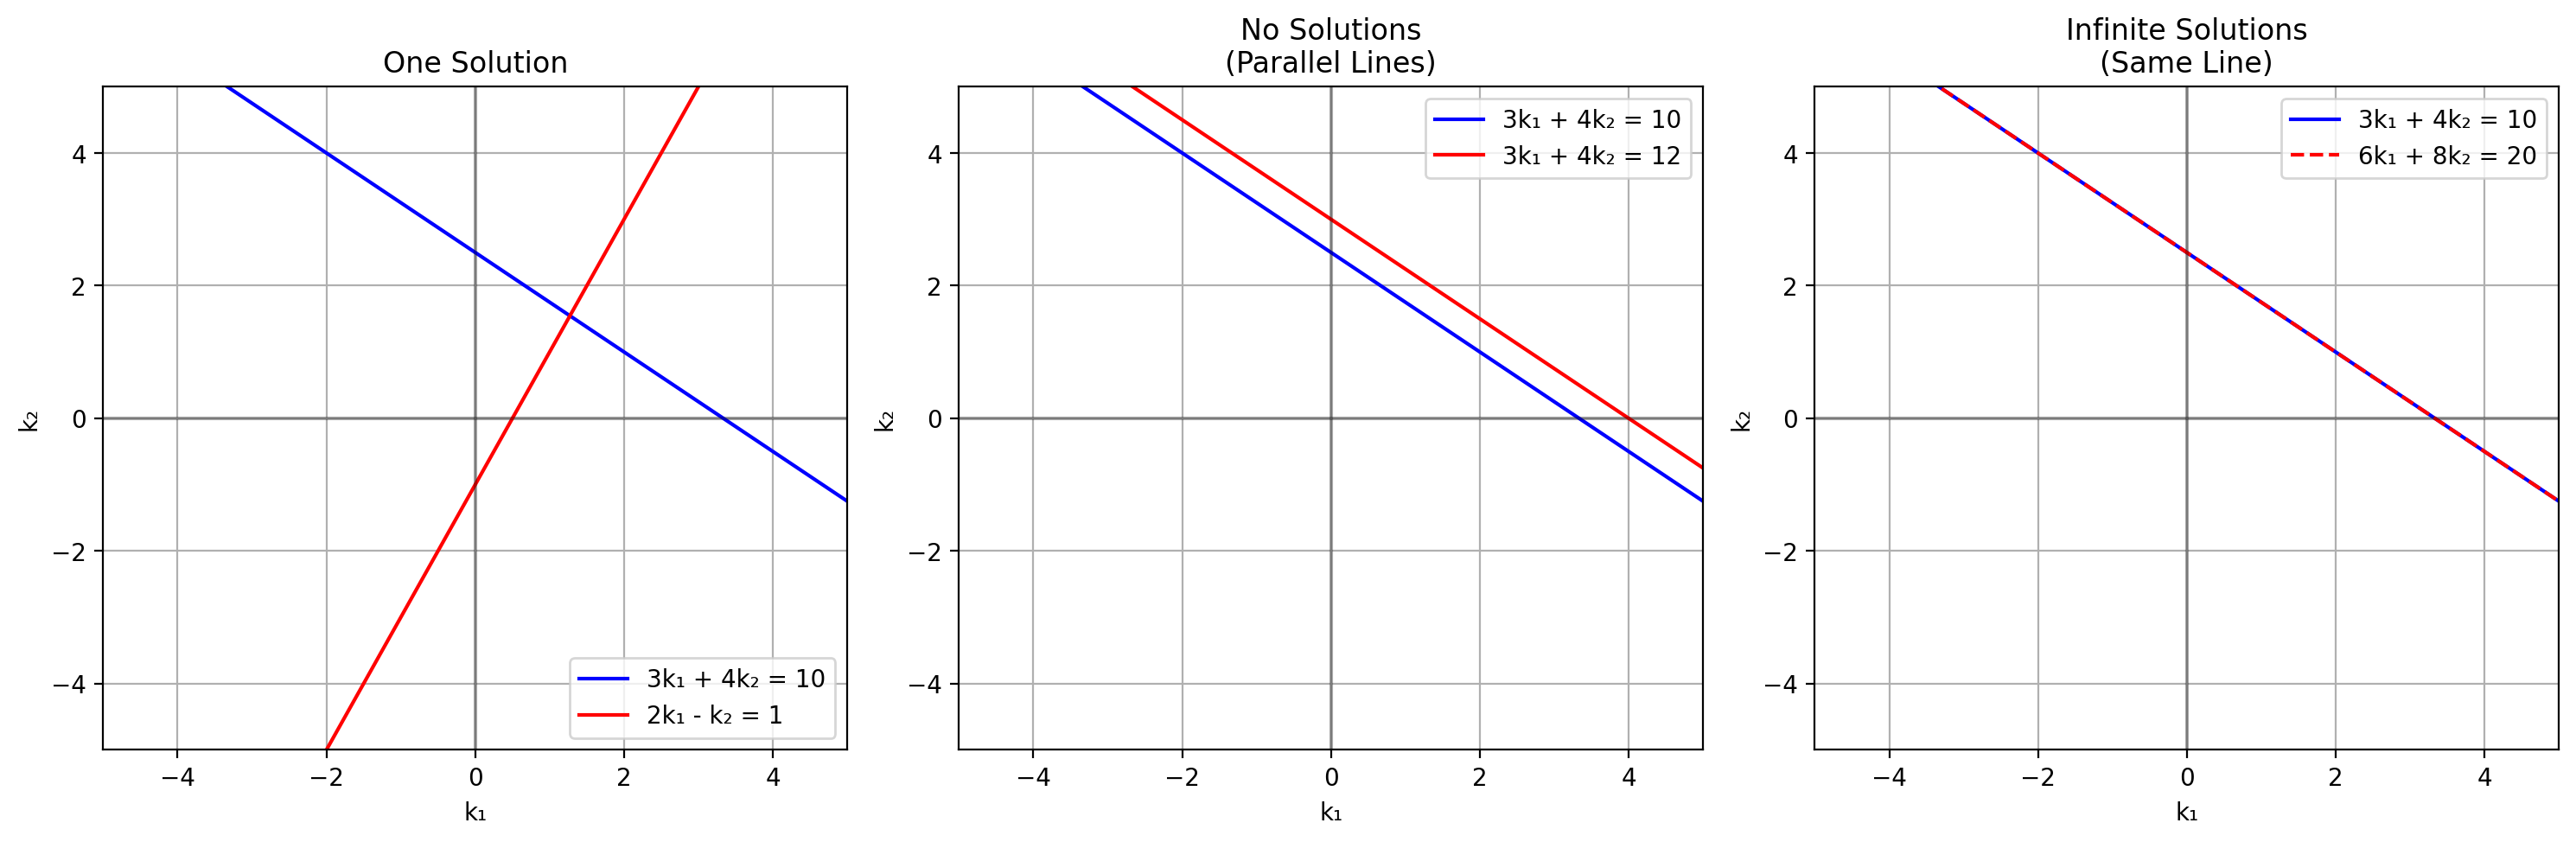

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_diophantine_cases():
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # Generate points
    k = np.linspace(-5, 5, 100)
    
    # Case 1: One solution (3k₁ + 4k₂ = 10 and 2k₁ - k₂ = 1)
    ax1.plot(k, (10 - 3*k)/4, 'b-', label='3k₁ + 4k₂ = 10')
    ax1.plot(k, 2*k - 1, 'r-', label='2k₁ - k₂ = 1')
    ax1.set_title('One Solution')
    
    # Case 2: No solutions (parallel lines)
    ax2.plot(k, (10 - 3*k)/4, 'b-', label='3k₁ + 4k₂ = 10')
    ax2.plot(k, (12 - 3*k)/4, 'r-', label='3k₁ + 4k₂ = 12')
    ax2.set_title('No Solutions\n(Parallel Lines)')
    
    # Case 3: Infinite solutions (same line)
    ax3.plot(k, (10 - 3*k)/4, 'b-', label='3k₁ + 4k₂ = 10')
    ax3.plot(k, (10 - 3*k)/4, 'r--', label='6k₁ + 8k₂ = 20')
    ax3.set_title('Infinite Solutions\n(Same Line)')
    
    # Format all plots
    for ax in (ax1, ax2, ax3):
        ax.grid(True)
        ax.set_xlabel('k₁')
        ax.set_ylabel('k₂')
        ax.legend()
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_diophantine_cases()

**AI Prompt**

why `a₁k₁ + b₁k₂ = c₁` is a line?

**AI Response**

Let me explain why `a₁k₁ + b₁k₂ = c₁` is a line:

1. This equation is in the same form as a standard linear equation `y = mx + b`, just rearranged.

2. We can solve for k₂:
```
a₁k₁ + b₁k₂ = c₁
b₁k₂ = c₁ - a₁k₁
k₂ = (c₁ - a₁k₁)/b₁
k₂ = (-a₁/b₁)k₁ + c₁/b₁
```

Now we can see it's in slope-intercept form:
- The slope is -a₁/b₁
- The y-intercept is c₁/b₁

For example, in our visualization:
- `3k₁ + 4k₂ = 10` becomes `k₂ = (-3/4)k₁ + 10/4`

Would you like me to add slope markers to the visualization to make this clearer?

**AI Prompt**

ok, I understand that. Now consitering cost `3X + Y` and we have parallel lines (infinite solutions) how to choose one with lowest cost?  Part2 has no upper bound of 100 for X,Y

**AI Response**

Ah, good question! When we have parallel lines (actually the same line) representing the solutions:

1. Any point (X,Y) on this line is a valid solution
2. The cost function `3X + Y` is also a linear function
3. Geometrically, lines of constant cost `3X + Y = C` are parallel lines with slope -3
4. The optimal solution will be where our solution line intersects the cost line with the smallest possible C

We need to:
1. Find the slope of our solution line
2. Compare it with the slope of the cost function (-3)
3. If slopes are different:
   - If solution line has slope > -3: follow line towards -∞
   - If solution line has slope < -3: follow line towards +∞
4. If slopes are equal: any point on the line has same cost

Would you like me to visualize this geometric interpretation, or shall we implement the solution directly?

In [ ]:
debug_diophantine_solutions(a=3*94,b=3*22,c=3*8400)
print()
debug_diophantine_solutions(a=5*94,b=5*22,c=5*8400)
print()
# solution are equal for lineary dependent equations
assert solve_diophantine(a=3*94,b=3*22,c=3*8400) == solve_diophantine(a=5*94,b=5*22,c=5*8400)

Solutions of 282*X + 66*Y = 25200
  x=16800 y=-71400 dx=11 dy=-47
have forms
  X=x + k*dx = 16800 + k*11
  Y=y + k*dy = -71400 + k*-47
e.g.:
  k=-1521  =>  X=69 Y=87  =>  282*69 + 66*87 = 25200
  k=-1520  =>  X=80 Y=40  =>  282*80 + 66*40 = 25200

Solutions of 470*X + 110*Y = 42000
  x=16800 y=-71400 dx=11 dy=-47
have forms
  X=x + k*dx = 16800 + k*11
  Y=y + k*dy = -71400 + k*-47
e.g.:
  k=-1521  =>  X=69 Y=87  =>  470*69 + 110*87 = 42000
  k=-1520  =>  X=80 Y=40  =>  470*80 + 110*40 = 42000



**AI Prompt**

iterate full_input and print all machine with infinite number of solutions, i.e. if its Diophantine equations are lineary dependent

**AI Response**

Here's code to find machines with linearly dependent equations:

```python
def is_linearly_dependent(a1: int, b1: int, c1: int, a2: int, b2: int, c2: int) -> bool:
    """Check if equations a1*k1 + b1*k2 = c1 and a2*k1 + b2*k2 = c2 are linearly dependent"""
    # Check if ratios are equal: a2/a1 = b2/b1 = c2/c1
    if a1 == 0 or b1 == 0:
        return False
    
    ratio_a = a2/a1
    ratio_b = b2/b1
    ratio_c = c2/c1 if c1 != 0 else float('inf')
    
    # Use small epsilon for float comparison
    return abs(ratio_a - ratio_b) < 1e-10 and abs(ratio_b - ratio_c) < 1e-10

print("Machines with infinite solutions:")
for i, (ax, ay, bx, by, tx, ty) in enumerate(full_input):
    if is_linearly_dependent(ax, bx, tx, ay, by, ty):
        print(f"\nMachine {i}:")
        print(f"{ax}*X + {bx}*Y = {tx}")
        print(f"{ay}*X + {by}*Y = {ty}")
        print(f"Ratios: {ay/ax:.3f} = {by/bx:.3f} = {ty/tx:.3f}")
```

This will show us which machines in Part 2 will have infinite possible solutions. Would you like me to explain any part of this code?

In [ ]:
def is_linearly_dependent(a1: int, b1: int, c1: int, a2: int, b2: int, c2: int) -> bool:
    """Check if equations a1*k1 + b1*k2 = c1 and a2*k1 + b2*k2 = c2 are linearly dependent"""
    # Check if ratios are equal: a2/a1 = b2/b1 = c2/c1
    if a1 == 0 or b1 == 0:
        return False
    
    ratio_a = a2/a1
    ratio_b = b2/b1
    ratio_c = c2/c1 if c1 != 0 else float('inf')
    
    # Use small epsilon for float comparison
    return abs(ratio_a - ratio_b) < 1e-10 and abs(ratio_b - ratio_c) < 1e-10

print("Machines with infinite solutions:")
for i, (ax, ay, bx, by, tx, ty) in enumerate(full_input):
    if is_linearly_dependent(ax, bx, tx, ay, by, ty):
        print(f"\nMachine {i}:")
        print(f"{ax}*X + {bx}*Y = {tx}")
        print(f"{ay}*X + {by}*Y = {ty}")
        print(f"Ratios: {ay/ax:.3f} = {by/bx:.3f} = {ty/tx:.3f}")

Machines with infinite solutions:


**AI Prompt**

ok, we know now, each machine has only one or none solution. 

Please write `solve_machine_using_eq` by refactoring `solve_machine` and using `find_intersection_params`

**AI Response**

I'll help refactor the code to use the intersection parameters approach:

```python
def solve_machine_using_eq(ax: int, ay: int, bx: int, by: int, tx: int, ty: int) -> tuple[bool, int | None]:
    """
    Solves a single machine puzzle using equation intersection, returns (solvable, min_tokens)
    where min_tokens is the minimum number of tokens needed (3*A + B)
    """
    # Solve both equations to get parametric solutions
    success_x, sol_x = solve_diophantine(ax, bx, tx)
    success_y, sol_y = solve_diophantine(ay, by, ty)
    
    if not (success_x and success_y):
        return False, None
        
    # Find intersection parameters
    x0_x, y0_x, dx_x, dy_x = sol_x
    x0_y, y0_y, dx_y, dy_y = sol_y
    
    success, (k1, k2) = find_intersection_params(
        x0_x, y0_x, dx_x, dy_x,
        x0_y, y0_y, dx_y, dy_y
    )
    
    if not success:
        return False, None
        
    # Calculate the intersection point
    X = x0_x + k1*dx_x
    Y = y0_x + k1*dy_x
    
    return True, 3*X + Y

def test_solve_machine_using_eq():
    # Test with the same cases as before
    assert solve_machine_using_eq(94, 34, 22, 67, 8400, 5400) == (True, 280)
    assert solve_machine_using_eq(26, 66, 67, 21, 12748, 12176) == (False, None)
    assert solve_machine_using_eq(17, 86, 84, 37, 7870, 6450) == (True, 200)
    assert solve_machine_using_eq(69, 23, 27, 71, 18641, 10279) == (False, None)
    print("All tests passed!")

test_solve_machine_using_eq()
```

This version:
1. Uses `solve_diophantine` to get parametric solutions for both equations
2. Uses `find_intersection_params` to find where these solutions intersect
3. Calculates the final X,Y point and its cost

Would you like me to explain any part in more detail?

In [ ]:
def solve_machine_using_eq(ax: int, ay: int, bx: int, by: int, tx: int, ty: int) -> tuple[bool, int | None]:
    """
    Solves a single machine puzzle using equation intersection, returns (solvable, min_tokens)
    where min_tokens is the minimum number of tokens needed (3*A + B)
    """
    # Solve both equations to get parametric solutions
    success_x, sol_x = solve_diophantine(ax, bx, tx)
    success_y, sol_y = solve_diophantine(ay, by, ty)
    
    if not (success_x and success_y):
        return False, None
        
    # Find intersection parameters
    x0_x, y0_x, dx_x, dy_x = sol_x
    x0_y, y0_y, dx_y, dy_y = sol_y
    
    success, (k1, k2) = find_intersection_params(
        x0_x, y0_x, dx_x, dy_x,
        x0_y, y0_y, dx_y, dy_y
    )
    
    if not success:
        return False, None
        
    # Calculate the intersection point
    X = x0_x + k1*dx_x
    Y = y0_x + k1*dy_x
    
    return True, 3*X + Y

def test_solve_machine_using_eq():
    # Test with the same cases as before
    assert solve_machine_using_eq(94, 34, 22, 67, 8400, 5400) == (True, 280)
    assert solve_machine_using_eq(26, 66, 67, 21, 12748, 12176) == (False, None)
    assert solve_machine_using_eq(17, 86, 84, 37, 7870, 6450) == (True, 200)
    assert solve_machine_using_eq(69, 23, 27, 71, 18641, 10279) == (False, None)
    print("All tests passed!")

test_solve_machine_using_eq()

11*k₁ + -67*k₂ = -6000
-47*k₁ + 34*k₂ = 66000
k₁ = 36000 + n*-67
k₂ = 6000 + n*-11
2775*n = 1554000
84*k₁ + -37*k₂ = -58700
-17*k₁ + 86*k₂ = 53020
k₁ = 645700 + n*-37
k₂ = 1467500 + n*-84
-6595*n = -115175080
All tests passed!


**AI Prompt**

now refactor to `min_tokens_for_all_prizes_using_eq`

**AI Response**

```python
def min_tokens_for_all_prizes_using_eq(machines: list[tuple[int, int, int, int, int, int]]) -> int:
    """Calculate minimum tokens needed to win all possible prizes using equation intersection method"""
    total_tokens = 0
    for i, (ax, ay, bx, by, tx, ty) in enumerate(machines):
        success, tokens = solve_machine_using_eq(ax, ay, bx, by, tx, ty)
        if success:
            total_tokens += tokens
    return total_tokens

def test_min_tokens_using_eq():
    # Test with sample input
    assert min_tokens_for_all_prizes_using_eq(sample_input) == 480
    print("Sample test passed!")
    
    # Test with full input
    result = min_tokens_for_all_prizes_using_eq(full_input)
    print(f"Full input result: {result}")

test_min_tokens_using_eq()
```

This version:
1. Uses our new `solve_machine_using_eq` function instead of the original
2. Maintains the same logic of summing up tokens for all solvable machines
3. Includes both sample and full input tests

Would you like me to add any additional testing or error handling?

In [ ]:
print(solve_machine(35, 12, 17, 52, 9516, 13408))
print(solve_machine_using_eq(35, 12, 17, 52, 9516, 13408))

(False, None)
(False, None)


In [ ]:
def min_tokens_for_all_prizes_using_eq(machines: list[tuple[int, int, int, int, int, int]]) -> int:
    """Calculate minimum tokens needed to win all possible prizes using equation intersection method"""
    total_tokens = 0
    for machine in machines:
        ax, ay, bx, by, tx, ty = machine
        try:
            success, tokens = solve_machine_using_eq(ax, ay, bx, by, tx, ty)
            if success:
                total_tokens += tokens
        except:
            print(f"Failed for machine {machine}")            
    return total_tokens

def test_min_tokens_using_eq():
    # Test with sample input
    assert min_tokens_for_all_prizes_using_eq(sample_input) == 480
    
    assert min_tokens_for_all_prizes_using_eq(full_input) == 31065
    print("All tests passed")

test_min_tokens_using_eq()

All tests passed


In [ ]:
def solve_part2():
    updated_full_input = [
        (ax, ay, bx, by, 10000000000000+tx, 10000000000000+ty) for (ax, ay, bx, by, tx, ty) in full_input
    ]

    return min_tokens_for_all_prizes_using_eq(updated_full_input)

solve_part2()

93866170395343

### Summary

#### Diophantine equations

Equations of the form

```
a*X + b*Y = c    X,Y∈ℤ
``` 

are called `Diophantine equations`. They can be solved using the Euclidean algorithm. The solutions have the form

```
X = x + k*dx     for any k∈ℤ
Y = y + k*dy
```


#### System of Diophantine equations

A system of two or more Diophantine equations is a system of linear equations. It can be reduced to at most two linearly independent equations.

```
a₁*X + b₁*Y = c₁  (EQ₁)
a₂*X + b₂*Y = c₂  (EQ₂)
```

The system has:
1. No solution if EQ₁ and EQ₂ are parallel, i.e., `EQ₂ = EQ₁ + ε` where `ε>0`
2. An infinite number of solutions if EQ₁ and  EQ₂ are linearly dependent, i.e., `EQ₂ = ε*EQ₁ + δ`. All solutions of EQ₁ are also solutions of EQ₂.
3. Otherwise, exactly one solution at the intersection of EQ₁ and EQ₂.

The intersection of EQ₁ and EQ₂ can again be computed using a Diophantine equation.

If `X₁ = x₁ + k₁*dx₁`  `Y₁ = y₁ + k₁*dy₁` are solutions of EQ₁ and `X₂ = x₂ + k₂*dx₂`  `Y₂ = y₂ + k₂*dy₂` are solutions of EQ₂, then since we search for X that solves both EQ₁ and EQ₂, we have `X₁ = X₂` and `Y₁ = Y₂`.

```
x₁ + k₁*dx₁ = x₂ + k₂*dx₁
y₁ + k₁*dy₁ = y₂ + k₂*dy₂
```

or

```
dx₁*k₁ - dx₂*k₂ = x₂-x₁  (EQ₃)
dy₁*k₁ - dy₂*k₂ = y₂-y₁  (EQ₄)
```

This is the next system Diophantine equations with variables k₁ and k₂ and 0, 1 or an infinite number of solutions.

We solve EQ₃ to find k₁ and k₂ in the form

```
k₁ = k₁₀ + n*dk₁   n∈ℤ
k₂ = k₂₀ + n*dk₂
```

and substitute to EQ₄

```
dy₁*k₁ - dy₂*k₂ = y₂-y₁
dy₁*(k₁₀ + n*dk₁) - dy₂*(k₂₀ + n*dk₂) = y₂-y₁
(dy₁*dk₁ - dy₂*dk₂)*n = y₂ - y₁ - (dy₁*k₁₀ - dy₂*k₂₀)
```

this is a linear equation with variable n that has 0, 1 or an infinite number of solutions.

Assuming the non-edge case and EQ₁ and EQ₂ are not parallel and linearly independet, then
```
n = (y₂ - y₁ - dy₁*k₁₀ + dy₂*k₂₀) / (dy₁*dk₁ - dy₂*dk₂)
```

Backwards substitution allows us to compute `k₁` and `k₂` then `X₁` and `Y₁`. This is the single solution to both EQ₁ and EQ₂.

**AI Prompt**

review my summary and provide a critique

**AI Response**

Your summary is very well-structured and mathematically precise. Here's my critique:

Strengths:
1. Clear progression from single Diophantine equation to systems
2. Excellent explanation of the three possible cases (no solution, one solution, infinite solutions)
3. Detailed derivation of how to find intersection using parametric forms

Suggestions for improvement:
1. Could mention that GCD plays a role in existence of solutions (c must be divisible by gcd(a,b))
2. Could clarify that "parallel" case happens when ratios a₂/a₁ = b₂/b₁ ≠ c₂/c₁
3. In the final equation for n, might be worth noting when denominator (dy₁*dk₁ - dy₂*dk₂) could be zero
4. Could add a note about how this relates to the practical problem (why we needed this math for the claw machines)

Would you like me to elaborate on any of these points?